In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime as dt
from pandas_datareader import data
import seaborn as sns
import altair as alt
%matplotlib inline

In [2]:
start = "2022-01-01"
end = "2022-06-30"

In [8]:
df = data.DataReader("^N225", "yahoo", start, end)

In [9]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-04,29323.789062,28954.560547,29098.410156,29301.789062,66000000,29301.789062
2022-01-05,29388.160156,29204.449219,29288.800781,29332.160156,78600000,29332.160156
2022-01-06,29158.949219,28487.869141,29136.750000,28487.869141,71600000,28487.869141
2022-01-07,28813.089844,28293.699219,28711.529297,28478.560547,75200000,28478.560547
2022-01-11,28473.470703,28089.490234,28380.900391,28222.480469,73700000,28222.480469


In [12]:
df_test = data.DataReader("^N225", "yahoo", start, end)
df_test.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-04,29323.789062,28954.560547,29098.410156,29301.789062,66000000,29301.789062
2022-01-05,29388.160156,29204.449219,29288.800781,29332.160156,78600000,29332.160156
2022-01-06,29158.949219,28487.869141,29136.750000,28487.869141,71600000,28487.869141
2022-01-07,28813.089844,28293.699219,28711.529297,28478.560547,75200000,28478.560547
2022-01-11,28473.470703,28089.490234,28380.900391,28222.480469,73700000,28222.480469


In [3]:
days = 30
data = yf.Ticker('8750.T').history(period=f'{days}d')

In [4]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-08,2684.0,2697.0,2650.5,2690.0,4337900,0,0
2022-06-09,2673.0,2686.0,2633.5,2637.5,3669700,0,0
2022-06-10,2613.5,2636.0,2590.0,2598.0,4898500,0,0
2022-06-13,2565.5,2620.5,2543.0,2608.0,3646500,0,0
2022-06-14,2604.5,2660.0,2599.0,2637.5,3884500,0,0


In [5]:
tickers = {
    "DL" : "8750.T",
}

In [26]:
def get_data(days, tickers):
    df = pd.DataFrame()
    for company in tickers.keys():
        tkr = yf.Ticker(tickers[company])
        hist = tkr.history(period=f'{days}d')
        hist.index = hist.index.strftime('%d %B %Y')
        hist = hist[['Close']]
        hist.columns = [company]
        hist = hist.T
        hist.index.name = 'Name'
        df = pd.concat([df, hist])
    return df

In [32]:
df.head()

Date,08 June 2022,09 June 2022,10 June 2022,13 June 2022,14 June 2022,15 June 2022,16 June 2022,17 June 2022,20 June 2022,21 June 2022,...,06 July 2022,07 July 2022,08 July 2022,11 July 2022,12 July 2022,13 July 2022,14 July 2022,15 July 2022,19 July 2022,20 July 2022
Name,,,,,,,,,,,,,,,,,,,,,
DL,2690.0,2637.5,2598.0,2608.0,2637.5,2645.0,2625.5,2556.5,2516.5,2552.5,...,2385.5,2380.0,2403.0,2442.5,2376.0,2419.0,2353.5,2280.5,2307.0,2356.0


In [36]:
df = df.T.reset_index()
df = pd.melt(df, id_vars=['Date']).rename(
columns={"value": "Stockprice"})

In [37]:
df.head()

,Date,Name,Stockprice
0,08 June 2022,DL,2690.0
1,09 June 2022,DL,2637.5
2,10 June 2022,DL,2598.0
3,13 June 2022,DL,2608.0
4,14 June 2022,DL,2637.5


<AxesSubplot:xlabel='Date', ylabel='Stockprice'>

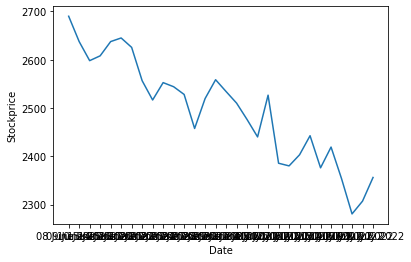

In [39]:
sns.lineplot(x="Date", y="Stockprice", data=df)

In [45]:
ymin=0
ymax=3500

chart = (
    alt.Chart(df)
    .mark_line(opacity=0.7, clip=True)
    .encode(
    x="Date:T",
    y=alt.Y("Stockprice:Q", stack=None, scale=alt.Scale(domain=[ymin,ymax])),
    color="Name:N"
)
)

In [46]:
chart

alt.Chart(...)

In [47]:
tickers = {
    "第一生命" : "8750.T",
    "かんぽ生命":"7181.T"
}

In [49]:
companies = list(tickers.keys())

In [50]:
companies

['第一生命', 'かんぽ生命']